# <감성 동조 챗봇 만들기>

# 0. 데이터 확인

In [ ]:
import pandas as pd

In [ ]:
# 단어장만들 추가 데이터들
movie_review = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/영화리뷰.csv',encoding='CP949')
purpose = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/용도별목적대화데이터.csv',encoding='CP949')
common_sense = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/일반상식.csv',encoding='CP949')
topic = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/주제별일상대화데이터.csv',encoding='CP949')

# 결측값 제거
movie_review.dropna(inplace=True)
purpose.dropna(inplace=True)
topic.dropna(inplace=True)
common_sense.dropna(inplace=True)

# 감성 대화 데이터
data = pd.read_excel('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/data_csv/감정대화_감정대분류.xlsx',header=0)
data.reset_index()
data

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1
0,8,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.,천천히라도 직장을 구해 보려고 하시는군요. 특별한 이유가 있으신가요?
1,10,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,요즘 직장생활이 너무 편하고 좋은 것 같아!,직장생활이 편하고 좋으시다니 좋아 보여요. 다니고 계신 회사만의 장점이 있나요?
2,11,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,취업해야 할 나이인데 취업하고 싶지가 않아.,취업하고 싶지 않으시군요. 혹시 어떤 이유가 있을까요?
3,23,청년,여성,"진로,취업,직장",해당없음,기쁨,만족스러운,우리 회사는 정말 사내 분위기가 좋아.,사내 분위기가 좋아서 즐거우시군요.
4,24,청년,여성,"진로,취업,직장",해당없음,기쁨,만족스러운,오늘 내가 다니는 회사가 참 좋은 직장이라는 생각이 들었어.,직장이 좋으시군요. 자세히 알려주실 수 있나요?
...,...,...,...,...,...,...,...,...,...
116537,116477,청년,남성,"연애,결혼,출산",해당없음,슬픔,환멸을 느끼는,조건을 다 맞춘 상태에서 결혼하기를 바라시는데 현실은 그렇지 않으니 양쪽 서로 힘이...,현실적인 문제로 결혼이 어려우시군요.
116538,116495,청년,여성,대인관계,해당없음,슬픔,눈물이 나는,아무래도 다들 일을 하게 되면서 예전보다 연락 빈도가 줄어들어서 그런 것 같아.,연락 빈도가 줄어들어 친구들과 멀어지는 느낌이 드셨군요.
116539,116507,청년,여성,대인관계,해당없음,슬픔,슬픔,누구나 한번은 죽는 게 당연한 건데 막상 그럴 일이 닥친다고 생각하니 슬퍼.,이럴 때 어떻게 하면 기분이 조금 나아질 수 있을까요?
116540,116509,청년,여성,대인관계,해당없음,슬픔,실망한,너무 속상하고 동료에게 실망스러웠어.,동료에게 험담을 들어 속상하고 동료에게 실망하셨군요.


In [ ]:
data.sample(5)

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1
112321,92750,중년,남성,"대인관계(부부, 자녀)",해당없음,슬픔,후회되는,아내는 신경을 쓴 건데 거절당했다고 생각해서 슬프다고 말하네. 먹어줄 것을 후회가 되네.,아내분이 슬퍼해서 후회되시나 봐요. 어떻게 하면 좋을까요?
104851,48666,청년,여성,"진로,취업,직장",해당없음,슬픔,실망한,아이를 키우면서 대학원을 다니고 있는데 아이 돌보느라 공부를 못하니 스트레스받고 불안해.,아이 돌보시느라 공부를 제대로 못 하니 불안하시군요.
55172,390,노년,남성,대인관계,만성질환 무,불안,불안,친구들도 나이가 있다 보니 혼자 사는 친구가 전화를 안 받으면 불안해서 집부터 찾아...,혼자 사시는 친구분이 연락이 되지 않으면 불안해서 집에 찾아가 안부를 확인하시는군요.
26778,73788,청소년,여성,학교폭력/따돌림,해당없음,당황,죄책감의,선생님께 들으면 내가 더 괴롭힐 걸 알고 말씀드리지 못한 것 같아.,어떻게 하면 나의 미안한 마음을 친구에게 전달할 수 있을까요?
87346,65959,중년,여성,"직장, 업무 스트레스",해당없음,상처,억울한,회사에서 대외비였던 내용이 내가 관리하는 거래처에 공개되었대. 근데 그걸 내가 공개...,하지도 않은 일로 의심받으니 억울하실 것 같아요. 공개된 이유를 체크해보셨어요?


In [ ]:
# 클래스별 데이터 갯수

data['감정_대분류'].value_counts()

불안    20866
분노    20834
상처    20300
슬픔    20256
당황    19608
기쁨    14678
Name: 감정_대분류, dtype: int64

In [ ]:
data['상황키워드'].value_counts()

대인관계            24578
진로,취업,직장        11586
재정              11038
건강,죽음            9966
가족관계             9196
연애,결혼,출산         8922
대인관계(부부, 자녀)     7708
학업 및 진로          7558
학교폭력/따돌림         7284
건강               6804
재정,은퇴,노후준비       6102
직장, 업무 스트레스      5800
Name: 상황키워드, dtype: int64

# 2. 데이터 전처리

### 1) 단어:품사 dict 만들기


In [ ]:
# 단어:품사 dict 만들기

# !pip install konlpy
from konlpy.tag import Komoran
import pickle

class Preprocess:

  def __init__(self,userdic=None):

    self.komoran = Komoran(userdic=userdic)

    self.exclusion_tags = [
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
    # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
    'JX', 'JC',
    # 보조사, 접속조사
    'SF', 'SP', 'SS', 'SE', 'SO',
    # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
    'EP', 'EF', 'EC', 'ETN', 'ETM',
    # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
    'XSN', 'XSV', 'XSA'
    # 명사파생접미사, 동사파생접미사, 형용사파생접미사
    ]
        
    # 형태소 분석기 POS 태거
  def pos(self, sentence):
    return self.komoran.pos(sentence)

    # 불용어 제거 후 필요한 품사 정보만 가져오기
  def get_keywords(self, pos, without_tag=False):
    f = lambda x: x in self.exclusion_tags
    # print(pos)
    word_list = []
    for p in pos:
        if f(p[1]) is False:
            word_list.append(p if without_tag is False else p[0])
    return word_list

In [ ]:
# 단어장 만들기 위한 추가 데이터
text1 = list(movie_review['document'])
text2 = list(purpose['text'])
text3 = list(topic['text'])
text4 = list(common_sense['query'])+list(common_sense['answer'])

# 감성 데이터
text5 = list(data['사람문장1'])
text6 = list(data['시스템문장1'])

all_sentence_data = text1 + text2 + text3 + text4 + text5 + text6
len(all_sentence_data)

2496406

### 2) 형태소:인덱스 단어장 만들고 저장함

In [ ]:
from tqdm import tqdm

# 문장(질문+대답) 리스트에서 모든 형태소 리스트 생성
# 약 5분 소요

# 전처리 객체
p = Preprocess()

# 모든 문장을 분해한 형태소 list(), 중복 O 되어있음
word_list = []
for sentence in tqdm(all_sentence_data):

  # 단어장 만들기 위해 추가한 데이터
  # 결측값 제거 안하면 nan값이 pos()되서 중간에 끊김
  # 미리 결측값 제거 해주었음

  # if type(sentence) != type('문장'):
  #   print(sentence)
  #   continue

  pos = p.pos(sentence)
  for k in pos:
    word_list.append(k[0])

# 모든 형태소 list임
word_list[:50]

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras import preprocessing
# 사전에 사용될 word2index 생성
# 사전의 첫번쨰 인덱스에는 OOV 사용
# OOV : 사전에 없는 단어는 word2index = 1로 바꿔줌
# OOV token 이란? https://hyoeun-log.tistory.com/entry/WEEK1-NLP-in-Tensorflow-Tokenizer-OOV-token-padsequences

tokenizer = preprocessing.text.Tokenizer(oov_token='OOV', num_words=100000) 
# num_words : 단어의 수가 많은대로 n개 만큼 보존한다
# https://han-py.tistory.com/284
# 현재 2469842개 단어 (중복O)

tokenizer.fit_on_texts(word_list)
word_index = tokenizer.word_index
print(len(word_index))

KeyboardInterrupt: ignored

In [ ]:
len(word_list), len(word_index)

(30449943, 158105)

In [ ]:
# key,value로 단어에 대응되는 인덱스들 출력해봄
word_list[0] , word_list[1] , word_list[2] , word_list[3] , word_list[4]

('어리', 'ㄹ', '때', '보고', '지금')

In [ ]:
word_index[word_list[0]], word_index[word_list[1]],word_index[word_list[2]] , word_index[word_list[3]],word_index[word_list[4]]

(359, 18, 72, 556, 95)

In [ ]:
word_list[10000] , word_list[12000] , word_list[13000] , word_list[15000] , word_list[4333]

('짜', '을', '이', '제', '^')

In [ ]:
word_index[word_list[10000]], word_index[word_list[12000]],word_index[word_list[13000]] , word_index[word_list[15000]]
# ,word_index[word_list[4333]]

(766, 12, 3, 325)

In [ ]:
%cd /content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/chatbot_dict/

import pickle

# bin 파일로 만들면 데이터 전송 시 빠르다(?)
f = open("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/chatbot_dict/emotion_chatbot_dict.bin","wb")
try:
  pickle.dump(word_index,f)
except Exception as e:
  print(e)
finally:
  f.close()

/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/chatbot_dict


In [ ]:
f = open("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/chatbot_dict/emotion_chatbot_dict.bin","rb")
word_index = pickle.load(f)
f.close()

# 확인1

# 전처리 객체 생성
# p = Preprocess(userdic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/useridc/user_dic.tsv')
# userdic 따로 만들지는 않음
p = Preprocess() 

# 예문
sent1 = "안녕! 감성 챗봇 단어장을 만들어 보고 있어! 한번 확인해 볼까?"

# 형태소 분석
pos = p.pos(sent1)

# 품사 태그없이 키워드 출력

keywords = p.get_keywords(pos,without_tag=True)
for word in keywords:
  try:
    print(word,word_index[word])
  except KeyError:
    # key없을 때 key 에러(단어가 사전에 없을때)
    # OOV 처리됌
    print(word,word_index['OOV'])

안녕 2531
감성 1864
챗봇 60475
단 782
어장 9546
만들 179
보 23
있 16
한 73
번 91
확인 162
보 23


In [ ]:
# 확인2

# 전처리 객체 생성
p = Preprocess() 

# 예문
sent2 = "최종 프로젝트 잘 마치고 취업합시다! 화이팅! 취뽀 가자! 오늘 점심 호호반점 갈까?"

# 형태소 분석
pos = p.pos(sent2)

# 품사 태그없이 키워드(단어만) 출력

keywords = p.get_keywords(pos,without_tag=True)
for word in keywords:
  try:
    print(word,word_index[word])
  except KeyError:
    # key없을 때 key 에러(단어가 사전에 없을때)
    # OOV 처리됌
    print(word,word_index['OOV'])

최종 3058
프로젝트 1970
잘 61
마치 1786
취업 523
화이팅 2253
취뽀 41136
가 8
오늘 165
점심 1100
호 1320
호반 18884
점 184
가 8


### 3) 새로 만든 형태소:인덱스 단어장을 전처리 객체에 추가함

In [ ]:
# 전처리 클래스에
#  단어 인덱스 사전 추가함

class Preprocess:

    # 생성자 __init에서 파라미터로 
    # 1) word2index_dic : 모든 단어에 대응되는 인덱스를 붙여한 파일, 감성 데이터+추가 데이터 형태소:품사 사전 추가함 emotion_chatnot_dict.bin
    # 2) user_dic.tsv : komoran에서 제공하지 않는 단어:품사 목록을 개발자가 작성함, 일단 현재는 사용하지 않음

    # def __init__(self, word2index_dic='../train_tools/dict/chatbot_dict.bin' ,userdic='user_dic.tsv'):
    def __init__(self, word2index_dic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/chatbot_dict/emotion_chatbot_dict.bin' ,userdic=None):
        # 단어 인덱스 사전 불러오기 추가
        if(word2index_dic != ''):
            f = open(word2index_dic, "rb")
            self.word_index = pickle.load(f)
            f.close()
            print("단어 사전 로드 완료..")
        else:
            self.word_index = None
            print("단어 사전 로드 실패..")

        # 형태소 분석기 초기화
        self.komoran = Komoran(userdic=userdic)

        # 제외할 품사
        # 참조 : https://docs.komoran.kr/firststep/postypes.html
        # 관계언 제거, 기호 제거
        # 어미 제거
        # 접미사 제거
        self.exclusion_tags = [
            'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
            'JX', 'JC',
            # 보조사, 접속조사
            'SF', 'SP', 'SS', 'SE', 'SO',
            # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
            'XSN', 'XSV', 'XSA'
            # 명사파생접미사, 동사파생접미사, 형용사파생접미사
        ]


    # 형태소 분석기 POS 태거
    def pos(self, sentence):
        return self.komoran.pos(sentence)

    # 불용어 제거 후 필요한 단어,품사 정보만 가져오기
    # True시 품사없이 단어만 list로 가져옴
    def get_keywords(self, pos, without_tag=False):
        f = lambda x: x in self.exclusion_tags
        word_list = []
        for p in pos:
            if f(p[1]) is False:
                word_list.append(p if without_tag is False else p[0])
        return word_list

    # 키워드를 단어 인덱스 시퀀스로 변환
    # 단어들에게 인덱스를 부여함

    def get_wordidx_sequence(self, keywords):
        if self.word_index is None:
            return []
        w2i = []
        for word in keywords:
            try:
                w2i.append(self.word_index[word])
            except KeyError:
                # 해당 단어가 사전에 없는 경우 OOV 처리
                w2i.append(self.word_index['OOV'])
        return w2i

# 3. 의도 분류 모델 학습 데이터 생성하기

### 1) 사용자 input : label 데이터 프레임 만들기

In [ ]:
# 감성 대화 데이터에서
# 질문 : label
# 을 학습하여 CNN 모델을 만들어야함

# 이후 tranformer 모델로 문장 유사도를 통해
# 답변을 출력하는 것임

# 먼저 CNN을 통해 분류를 해야함
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Komoran
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_excel('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/data_csv/감정대화_감정대분류.xlsx')
train_df.head()

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1
0,8,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.,천천히라도 직장을 구해 보려고 하시는군요. 특별한 이유가 있으신가요?
1,10,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,요즘 직장생활이 너무 편하고 좋은 것 같아!,직장생활이 편하고 좋으시다니 좋아 보여요. 다니고 계신 회사만의 장점이 있나요?
2,11,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,취업해야 할 나이인데 취업하고 싶지가 않아.,취업하고 싶지 않으시군요. 혹시 어떤 이유가 있을까요?
3,23,청년,여성,"진로,취업,직장",해당없음,기쁨,만족스러운,우리 회사는 정말 사내 분위기가 좋아.,사내 분위기가 좋아서 즐거우시군요.
4,24,청년,여성,"진로,취업,직장",해당없음,기쁨,만족스러운,오늘 내가 다니는 회사가 참 좋은 직장이라는 생각이 들었어.,직장이 좋으시군요. 자세히 알려주실 수 있나요?


In [ ]:
train_df.sample(5)

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1
98675,14207,청년,남성,"연애,결혼,출산",해당없음,슬픔,실망한,내가 턱걸이를 못해서 허우적거리고 있는데 여자 친구가 실망한 표정이었어.,여자 친구의 실망으로 기분이 안 좋으시군요.
83345,43093,청소년,남성,가족관계,해당없음,상처,"가난한, 불우한",내 친구들은 다 학원에서 미리 배워와서 수업 시간에 잘하는데 나만 진도를 못 따라가...,진도가 뒤처져서 마음이 불편하시군요.
33527,111523,청년,남성,대인관계,해당없음,당황,혼란스러운,근데 그렇게 많은 술을 마신 것도 아닌데 일부러 그런 것 같기도 해서 좀 혼란스러워.,그런 혼란한 감정을 어떻게 변화시킬 수 있을까요?
1428,8750,청년,여성,"연애,결혼,출산",해당없음,기쁨,신이 난,나 오늘 남자친구한테 프러포즈 받았어! 행복하고 신나고 너무 좋아!,남자친구한테 프러포즈 받아서 신나시는군요.
56905,9028,청년,여성,"진로,취업,직장",해당없음,불안,당혹스러운,직장 상사에게 크게 꾸지람을 들었어. 한 번도 이렇게 혼내신 적이 없는 분이라 너무...,직장 상사분이 갑작스럽게 큰 화를 내셔서 많이 놀라셨겠어요.


In [ ]:
train_df = train_df.rename(columns={'연령':'age'})
train_df = train_df.rename(columns={'성별':'gender'})
train_df = train_df.rename(columns={'상황키워드':'subject'})
train_df = train_df.rename(columns={'감정_대분류':'emotion'})
train_df = train_df.rename(columns={'사람문장1':'input'})
train_df = train_df.rename(columns={'시스템문장1':'output'})
train_df.sample(5)

,Unnamed: 0,age,gender,subject,신체질환,emotion,감정_소분류,input,output
99756,20905,청소년,여성,학업 및 진로,해당없음,슬픔,낙담한,친구랑 같이 시험공부 했었는데 이번 시험에 친구만 성적이 엄청 올랐어.,같이 공부 했는데 친구만 성적이 올라서 속상하겠어요.
10200,75726,청년,여성,"진로,취업,직장",해당없음,기쁨,흥분,부모님에게 이 사실을 당장 말해주고 싶은데 뭐라고 말해야 될까?,무슨 말을 하는 것이 가장 좋을까요?
111980,90820,중년,여성,"재정,은퇴,노후준비",해당없음,슬픔,후회되는,말도 마. 이대로라면 노후에 백만 원으로 한 달을 살아야 할 판이야.,노후에 백만 원으로 살아가야 할 형편이군요.
79916,23900,중년,여성,"직장, 업무 스트레스",해당없음,상처,질투하는,우리 부장이 다들 열심히 일 하는데 김 대리에게만 부드럽게 대해줘서 너무 질투가 나.,회사에서 그런 일 때문에 많이 상처받으셨겠어요.
78880,17682,노년,여성,대인관계,만성질환 무,상처,배신당한,옛날에 이혼한 남편이 위독하다고 해서 돈을 빌려주었더니 거짓말이더라. 정말 화가 나.,이혼한 남편의 거짓말에 정말 화가 나고 속상하시겠어요.


In [ ]:
train_df = train_df[['age','gender','subject','emotion','input','output']]
train_df.sample(5)

,age,gender,subject,emotion,input,output
51584,노년,여성,대인관계,분노,아들을 잃은 후로 통 웃지도 않고 누구와 속을 터놓고 대화도 하지 않아.,친구분이 아들을 잃어 정말 슬퍼하시는 것처럼 들려요.
38948,노년,여성,대인관계,분노,동네 할머니들이 악의적인 헛소문으로 나를 아주 괴롭히는데 아주 화가 나네.,헛소문으로 괴롭힘을 당했다니 너무 화가 났겠어요.
70337,노년,여성,재정,불안,난 불쌍하게 보이고 싶지 않지만 돈이 필요해.,사람들이 불쌍히 여기지 않으면서 빌리는 방법이 있을까요?
54138,중년,남성,"재정,은퇴,노후준비",분노,맞아. 그래서 나는 갑자기 돈이 필요할 때마다 없어.,갑자기 돈이 급한데 돈이 없으면 엄청 당황스럽겠네요. 어떻게 해야 될까요?
37245,노년,여성,재정,분노,전 재산을 털어서 수술을 하려고 하는 데 수술을 해서 나아질까 싶어서 짜증 나.,수술이 의미가 있을까 싶어서 마음이 불편하시군요.


In [ ]:
# LabelEncoding 하기

import numpy as np
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

subject_labels = train_df['subject']
encoder.fit(subject_labels)
encoded_subject_labels = encoder.transform(subject_labels)
subject_labels[15], encoded_subject_labels[15] , subject_labels[33333], encoded_subject_labels[33333] , subject_labels[77777], encoded_subject_labels[77777]

('연애,결혼,출산', 5, '대인관계', 3, '직장, 업무 스트레스', 8)

In [ ]:
print(encoder.classes_)

['가족관계' '건강' '건강,죽음' '대인관계' '대인관계(부부, 자녀)' '연애,결혼,출산' '재정' '재정,은퇴,노후준비'
 '직장, 업무 스트레스' '진로,취업,직장' '학교폭력/따돌림' '학업 및 진로']


In [ ]:
train_df['subject_label'] = encoded_subject_labels
train_df

<ipython-input-77-33628ede40f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['subject_label'] = encoded_subject_labels


,age,gender,subject,emotion,input,output,subject_label
0,청년,여성,"진로,취업,직장",기쁨,퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.,천천히라도 직장을 구해 보려고 하시는군요. 특별한 이유가 있으신가요?,9
1,청년,여성,"진로,취업,직장",기쁨,요즘 직장생활이 너무 편하고 좋은 것 같아!,직장생활이 편하고 좋으시다니 좋아 보여요. 다니고 계신 회사만의 장점이 있나요?,9
2,청년,여성,"진로,취업,직장",기쁨,취업해야 할 나이인데 취업하고 싶지가 않아.,취업하고 싶지 않으시군요. 혹시 어떤 이유가 있을까요?,9
3,청년,여성,"진로,취업,직장",기쁨,우리 회사는 정말 사내 분위기가 좋아.,사내 분위기가 좋아서 즐거우시군요.,9
4,청년,여성,"진로,취업,직장",기쁨,오늘 내가 다니는 회사가 참 좋은 직장이라는 생각이 들었어.,직장이 좋으시군요. 자세히 알려주실 수 있나요?,9
...,...,...,...,...,...,...,...
116537,청년,남성,"연애,결혼,출산",슬픔,조건을 다 맞춘 상태에서 결혼하기를 바라시는데 현실은 그렇지 않으니 양쪽 서로 힘이...,현실적인 문제로 결혼이 어려우시군요.,5
116538,청년,여성,대인관계,슬픔,아무래도 다들 일을 하게 되면서 예전보다 연락 빈도가 줄어들어서 그런 것 같아.,연락 빈도가 줄어들어 친구들과 멀어지는 느낌이 드셨군요.,3
116539,청년,여성,대인관계,슬픔,누구나 한번은 죽는 게 당연한 건데 막상 그럴 일이 닥친다고 생각하니 슬퍼.,이럴 때 어떻게 하면 기분이 조금 나아질 수 있을까요?,3
116540,청년,여성,대인관계,슬픔,너무 속상하고 동료에게 실망스러웠어.,동료에게 험담을 들어 속상하고 동료에게 실망하셨군요.,3


In [ ]:
encoder = LabelEncoder()

emotion_labels = train_df['emotion']
encoder.fit(emotion_labels)
encoded_emotion_labels = encoder.transform(emotion_labels)
emotion_labels[15], encoded_emotion_labels[15] , emotion_labels[33333], encoded_emotion_labels[33333] , emotion_labels[77777], encoded_emotion_labels[77777]

('기쁨', 0, '당황', 1, '상처', 4)

In [ ]:
print(encoder.classes_)

['기쁨' '당황' '분노' '불안' '상처' '슬픔']


In [ ]:
train_df['emotion_label'] = encoded_emotion_labels
train_df = train_df[['age','gender','subject','emotion','input','output','subject_label','emotion_label']]
train_df

,age,gender,subject,emotion,input,output,subject_label,emotion_label
0,청년,여성,"진로,취업,직장",기쁨,퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.,천천히라도 직장을 구해 보려고 하시는군요. 특별한 이유가 있으신가요?,9,0
1,청년,여성,"진로,취업,직장",기쁨,요즘 직장생활이 너무 편하고 좋은 것 같아!,직장생활이 편하고 좋으시다니 좋아 보여요. 다니고 계신 회사만의 장점이 있나요?,9,0
2,청년,여성,"진로,취업,직장",기쁨,취업해야 할 나이인데 취업하고 싶지가 않아.,취업하고 싶지 않으시군요. 혹시 어떤 이유가 있을까요?,9,0
3,청년,여성,"진로,취업,직장",기쁨,우리 회사는 정말 사내 분위기가 좋아.,사내 분위기가 좋아서 즐거우시군요.,9,0
4,청년,여성,"진로,취업,직장",기쁨,오늘 내가 다니는 회사가 참 좋은 직장이라는 생각이 들었어.,직장이 좋으시군요. 자세히 알려주실 수 있나요?,9,0
...,...,...,...,...,...,...,...,...
116537,청년,남성,"연애,결혼,출산",슬픔,조건을 다 맞춘 상태에서 결혼하기를 바라시는데 현실은 그렇지 않으니 양쪽 서로 힘이...,현실적인 문제로 결혼이 어려우시군요.,5,5
116538,청년,여성,대인관계,슬픔,아무래도 다들 일을 하게 되면서 예전보다 연락 빈도가 줄어들어서 그런 것 같아.,연락 빈도가 줄어들어 친구들과 멀어지는 느낌이 드셨군요.,3,5
116539,청년,여성,대인관계,슬픔,누구나 한번은 죽는 게 당연한 건데 막상 그럴 일이 닥친다고 생각하니 슬퍼.,이럴 때 어떻게 하면 기분이 조금 나아질 수 있을까요?,3,5
116540,청년,여성,대인관계,슬픔,너무 속상하고 동료에게 실망스러웠어.,동료에게 험담을 들어 속상하고 동료에게 실망하셨군요.,3,5


In [ ]:
train_df.to_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/data_csv/감정대화_감정대분류_전처리파일.csv',index=False)

### 2) 만든 Dataframe에서 각 input 문장의 핵심 품사를 가진 단어들만 추출함

In [ ]:
train_df= pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/data_csv/감정대화_감정대분류_전처리파일.csv')

tokenizer = Komoran()

# train_df의 모든 사용자 input문장을 형태소/품사로 분해하여 리스트에 저장
input_tokenized = [[token+"/"+POS for token, POS in tokenizer.pos(input)] for input in  train_df['input']]

KeyboardInterrupt: ignored

In [ ]:
len(input_tokenized)

116542

In [ ]:
exclusion_tags = [
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            'JX', 'JC',
            'SF', 'SP', 'SS', 'SE', 'SO',
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            'XSN', 'XSV', 'XSA'
]

f = lambda x: x in exclusion_tags
f

<function __main__.<lambda>(x)>

In [ ]:
input_tokenized[5] , input_tokenized[25000] , input_tokenized[50000] , input_tokenized[75000]

# 참고
# self.exclusion_tags = [
#     'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
#     # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
#     'JX', 'JC',
#     # 보조사, 접속조사
#     'SF', 'SP', 'SS', 'SE', 'SO',
#     # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
#     'EP', 'EF', 'EC', 'ETN', 'ETM',
#     # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
#     'XSN', 'XSV', 'XSA'
#     # 명사파생접미사, 동사파생접미사, 형용사파생접미사
# ]


(['회사/NNG',
  '에서/JKB',
  '전공/NNG',
  '시험/NNG',
  '을/JKO',
  '보/VV',
  '았/EP',
  '어/EF',
  './SF',
  '오늘/NNG',
  '시험/NNG',
  '결과/NNG',
  '가/JKS',
  '나오/VV',
  '았/EP',
  '어/EF',
  './SF'],
 ['막상/MAG',
  '준비/NNG',
  '하/XSV',
  '려니/EC',
  '얼굴/NNG',
  '이/JKS',
  '붉어지/VV',
  '는/ETM',
  '것/NNB',
  '만/JX',
  '같/VA',
  '아/EF',
  './SF'],
 ['걱정/NNG',
  '되/XSV',
  '고/EC',
  '얼른/MAG',
  '병원/NNG',
  '에/JKB',
  '가/VV',
  '아서/EC',
  '건강/NNG',
  '을/JKO',
  '체크/NNG',
  '하/XSV',
  '아/EC',
  '보/VX',
  '아야/EC',
  '하/VX',
  '겠/EP',
  '어/EF',
  './SF'],
 ['하루/NNG',
  '이틀/NNG',
  '전/NNG',
  '에/JKB',
  '도/JX',
  '계속/MAG',
  '그렇/VA',
  '었/EP',
  '었/EP',
  '는데/EC',
  '정말/MAG',
  '스트레스/NNG',
  '받/VV',
  '을/ETM',
  '지경/NNB',
  '이/VCP',
  '야/EF',
  './SF'])

In [ ]:
core_input_tokenized = []

# i는 문장의 갯수
for i in range(len(input_tokenized)):
        temp = []
        # data_tokenized[0]=> 한 문장
        # j는 한 문장을 구성하는 '단어/품사' 갯수
        for j in range(len(input_tokenized[i])):
            # f에 품사를 넣음
            # exclusion_tags 리스트에 포함되지 않는 품사면 append!
            # 필요없는 품사가 아니면 append
            # (조사 같은 것들은 제외!)
            if f(input_tokenized[i][j].split('/')[1]) is False:
                temp.append(input_tokenized[i][j].split('/')[0])
        core_input_tokenized.append(temp)

In [ ]:
input_tokenized[33] , core_input_tokenized[33]

(['대학수학능력시험/NNP',
  '을/JKO',
  '잘/MAG',
  '보/VV',
  '아서/EC',
  '서울대/NNP',
  '에/JKB',
  '지원/NNG',
  '하/XSV',
  '았/EP',
  '어/EF',
  './SF'],
 ['대학수학능력시험', '잘', '보', '서울대', '지원'])

In [ ]:
input_tokenized[3333] , core_input_tokenized[3333]

(['나/NP',
  '는/JX',
  '아들/NNG',
  '에게/JKB',
  '정말/MAG',
  '좋/VA',
  '은/ETM',
  '엄마/NNG',
  '이/VCP',
  '라/EC',
  '자부/NNG',
  '하/XSV',
  'ㄹ/ETM',
  '수/NNB',
  '있/VX',
  '어/EF',
  './SF'],
 ['나', '아들', '정말', '좋', '엄마', '이', '자부', '수', '있'])

### 3) 각 input 문장들에서 추출한 핵심 단어 리스트들의 최대 길이를 구함
### 최대 어느 길이의 데이터까지 학습시킬지 결정

In [ ]:
# 불용어들을 제외한 '의미있는' 단어들의 길이들을 모아놓은 num_tokens
num_tokens = [len(tokens) for tokens in core_input_tokenized]
num_tokens = np.array(num_tokens)

# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_tokens)}")
print(f"토큰 길이 최대: {np.max(num_tokens)}")
print(f"토큰 길이 표준편차: {np.std(num_tokens)}")

토큰 길이 평균: 10.256396835475622
토큰 길이 최대: 45
토큰 길이 표준편차: 3.5207161259364774


In [ ]:
# list를 np.array에 넣으면?

list1 = [1,2,3]
list1 = np.array(list1)
list1

array([1, 2, 3])

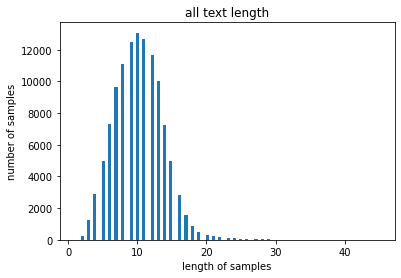

In [ ]:
plt.title('all text length')
plt.hist(num_tokens, bins=100)
# bins는 가로축 구간의 개수
# (막대 그래프의 갯수)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
select_length = 25


def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
        
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

# core_input_tokenized에는 전체 문장 데이터들을 token화 시킨 뒤,
# 의미있는 단어들의 품사들만 필터링한 (불용어 처리한) 단어들의 집함임!    
below_threshold_len(select_length, core_input_tokenized)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 0.99774330284361


In [ ]:
# input 문장들중 핵심 단어 25개인 input들만 사용해서 99% 활용할 수 있음

# 단어 시퀀스 벡터 크기
MAX_SEQ_LEN = 25

### 4) input의 최대 길이를 알았으니 PADDING 처리를 해주자!

In [ ]:
# Conv1D, 의도 분류 모델이기 때문에 softmax

# label 종류별 수
# 대인관계            21852
# 진로,취업,직장        10448
# 재정               9924
# 건강,죽음            8444
# 가족관계             8416
# 연애,결혼,출산         8170
# 대인관계(부부, 자녀)     6804
# 학업 및 진로          6566
# 학교폭력/따돌림         6182
# 건강               6044
# 재정,은퇴,노후준비       5476
# 직장, 업무 스트레스      4934

import pandas as pd
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Conv1D, GlobalMaxPool1D, concatenate

#from utils.Preprocess import Preprocess
# 대신 직접 class 선언해줌! (import 파일 만들기 귀찮음)

class Preprocess:
    def __init__(self, word2index_dic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/chatbot_dict/emotion_chatbot_dict.bin' ,userdic=None): # userdic 인자에는 사용자 정의 사전 파일 경로 입력가능
        # 단어 인덱스 사전 불러오기 추가
        if(word2index_dic != ''):
            f = open(word2index_dic, "rb")
            self.word_index = pickle.load(f)
            f.close()
            print("단어 사전 로드 완료..")
        else:
            self.word_index = None
            print("단어 사전 로드 실패..")

        # 형태소 분석기 초기화
        self.komoran = Komoran(userdic=userdic)

        # 제외할 품사
        # 참조 : https://docs.komoran.kr/firststep/postypes.html
        # 관계언 제거, 기호 제거
        # 어미 제거
        # 접미사 제거
        self.exclusion_tags = [
            'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
            'JX', 'JC',
            # 보조사, 접속조사
            'SF', 'SP', 'SS', 'SE', 'SO',
            # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
            'XSN', 'XSV', 'XSA'
            # 명사파생접미사, 동사파생접미사, 형용사파생접미사
        ]


    # 형태소 분석기 POS 태거
    def pos(self, sentence):
        return self.komoran.pos(sentence)

    # 불용어 제거 후 필요한 품사 정보만 가져오기
    def get_keywords(self, pos, without_tag=False):
        f = lambda x: x in self.exclusion_tags
        word_list = []
        for p in pos:
            if f(p[1]) is False:
                word_list.append(p if without_tag is False else p[0])
        return word_list

    # 키워드를 단어 인덱스 시퀀스로 변환
    def get_wordidx_sequence(self, keywords):
        if self.word_index is None:
            return []
        w2i = []
        for word in keywords:
            try:
                w2i.append(self.word_index[word])
            except KeyError:
                # 해당 단어가 사전에 없는 경우 OOV 처리
                w2i.append(self.word_index['OOV'])
        return w2i

In [ ]:
!pwd

# Load Data
data = pd.read_csv("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/data_csv/감정대화_감정대분류_전처리파일.csv")

/content


In [ ]:
data.sample(5)

,age,gender,subject,emotion,input,output,subject_label,emotion_label
27383,노년,남성,대인관계,당황,하루에 세 병씩 마시고 일주일에 세 번을 같이 마신 친구였어.,하루에 세 병씩 마시고 일주일에 세 번을 같이 마신 친구였군요. 이 상황에서 어떻게...,3,1
25135,청년,남성,대인관계,당황,한 번도 그 친구를 여자로 생각해본 적이 없는데 나도 내 마음을 모르겠네. 너무 혼...,처음으로 이성으로서 어떤지 고민해보게 되었네요.,3,1
19954,청년,남성,"진로,취업,직장",당황,일하는 중에 휴대폰이 울려서 너무 창피하네.,휴대폰 소리 때문에 갑자기 부끄러워졌겠어요.,9,1
115187,중년,남성,"대인관계(부부, 자녀)",슬픔,돈 벌어오고 예쁜 옷도 사줬지만 정작 같이 있어 주지 못한 게 너무 한이 된다.,쓸쓸한 마음이 크시겠어요. 이런 상황에 할 수 있는 긍정적인 행동이 있지 않을까요?,4,5
102404,청소년,여성,학업 및 진로,슬픔,금일도 학교에 가지 않았어.,그래요? 무슨 사건 있는건가요?,11,5


In [ ]:
# age 청년만
data = data.loc[data['age']=='청년',:]
data.sample(5)

,age,gender,subject,emotion,input,output,subject_label,emotion_label
22963,청년,남성,"진로,취업,직장",당황,나는 가난해서 가정을 꾸리고 살 자신도 없어. 못난 내가 싫어.,형편이 어려워서 미래에 대한 부정적인 생각이 드시나 봐요. 힘드시겠어요.,9,1
52988,청년,여성,"진로,취업,직장",분노,다른 건 다 좋은데 말이 어눌해서 채용하기 힘들데. 나는 왜 이렇게 태어난 걸까?,다른 건 다 좋은데 말이 어눌한 것 때문이면 어떻게 해야 할까요?,9,2
4550,청년,남성,대인관계,기쁨,대학교 입학하고 만나기로 한 중학교 동창들을 이번에 만나기로 했어!,중학교 동창을 오랜만에 만난다니 설레고 기대되시겠어요!,3,0
108400,청년,여성,"진로,취업,직장",슬픔,이번에 또 회사면접에서 떨어졌어.,면접이 자꾸 마음대로 되지 않아 마음이 상하시겠어요.,9,5
113829,청년,남성,"진로,취업,직장",슬픔,내 스트레스를 아내한테 풀면 안 되는 건데 너무 미안해서 눈물이 나고 슬퍼.,이 상황을 해결 하기 위해 무엇을 하면 좋을까요?,9,5


In [ ]:
data.count()

age              32810
gender           32810
subject          32810
emotion          32810
input            32810
output           32810
subject_label    32810
emotion_label    32810
dtype: int64

In [ ]:
data['age'].value_counts

<bound method IndexOpsMixin.value_counts of 0         청년
1         청년
2         청년
3         청년
4         청년
          ..
116537    청년
116538    청년
116539    청년
116540    청년
116541    청년
Name: age, Length: 32810, dtype: object>

In [ ]:
# text는 모든 문장들의 list
inputs = data['input'].tolist()
# label은 모든 label의 list
emotion_labels = data['emotion_label'].tolist()

In [ ]:
# Load preprocessor
p = Preprocess(word2index_dic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/chatbot_dict/emotion_chatbot_dict.bin',
               userdic=None)

단어 사전 로드 완료..


In [ ]:
# Data preprocess

# !pip install tqdm
from tqdm import tqdm

sequences = []
check_keywords = True
# text는 모든 문장들의 list
for sentence in tqdm(inputs):

    # 문장을 [(단어1,품사1),(단어2,품사2)...] 로 변환
    pos = p.pos(sentence)

    # get_keywords(pos, without_tag=True) => 불용어 처리 후 품사(태그)없이 단어들만의 list
    # keywords : 불용어 처리된 [(단어1,품사1),(단어2,품사2)...], list형
    keywords = p.get_keywords(pos, without_tag=True)

    # 첫번째 keywords 와 sequence[0] 어떻게 대응되는지 체크해보고 싶음
    if check_keywords is True:
      print(keywords)
      check_keywords = False
    # 태그없이 '단어'만 있는 keywords에서 [[단어1,단어2],[단어1,단어2,단어3]...]들을 인덱싱해줌
    # 우리가 만든 단어사전에 없으면(OOV token이므로 인덱스 1로 고정)
    seq = p.get_wordidx_sequence(keywords)
    sequences.append(seq)

  1%|          | 243/32810 [00:00<00:26, 1234.81it/s]

['퇴사', '지', '얼마', '안', '되', '천천히', '직장', '구하', '보']


100%|██████████| 32810/32810 [01:10<00:00, 463.52it/s]


In [ ]:
# 문장에서 의미 있는 품사만 남기고
# index 대응시킴
# ['퇴사', '지', '얼마', '안', '되', '천천히', '직장', '구하', '보']

print(sequences[0])

[2352, 22, 347, 37, 24, 1953, 543, 865, 23]


In [ ]:
# set padding length & pad to sequences

# import 하지말고 직접 선언!
#from config.GlobalParams import MAX_SEQ_LEN


# 단어 시퀀스 벡터 크기 (데이터 99% 활용가능)
MAX_SEQ_LEN = 25

#from tensorflow.keras import preprocessing
# 최대 크기를 25단어로 하고 그 보다 길이가 작은 문장들은 뒤에 0이라는 의미없는 단어를 을 채워서 문장 길이를 25단어로 맞춤
# https://wikidocs.net/83544
# padding=post 안하면 앞에서 부터 0을 채움

padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

In [ ]:
# 모델에 넣어 학습하기 위해
# 문장별로 단어의 갯수를 25개로 맞춰줌

len(padded_seqs[33]) ,len(padded_seqs[333]),len(padded_seqs[3333])

(25, 25, 25)

In [ ]:
padded_seqs[333] ,padded_seqs[3333],padded_seqs[3333]

(array([427, 966, 880,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       dtype=int32),
 array([1055,  804, 5077, 1061,  221,    2, 2867,  256, 2043,   38,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0], dtype=int32),
 array([1055,  804, 5077, 1061,  221,    2, 2867,  256, 2043,   38,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0], dtype=int32))

### 5) word2index , PADDING 해준 문장들을 tensor화 시키자!

In [ ]:
# data to tensor

# tf.data.Dataset.from_tensor_slices((데이터,라벨))
# 데이터와 라벨을 묶음
# https://yuna96.tistory.com/77
ds = tf.data.Dataset.from_tensor_slices((padded_seqs,emotion_labels))

# 섞어줌
# 크기만큼 섞어야 다섞임
# https://helloyjam.github.io/tensorflow/buffer-size-in-shuffle/
ds = ds.shuffle(len(inputs))

In [ ]:
# set train & validation & test size

# 갯수 설정
# https://dacon.io/en/codeshare/5774
train_size = int(len(padded_seqs) * 0.7)
val_size = int(len(padded_seqs) * 0.2)
test_size = int(len(padded_seqs) * 0.1)

# 교차검증(?) take().take() 잘은 모르겠음
train_ds = ds.take(train_size).batch(100)
val_ds = ds.take(train_size).take(val_size).batch(100)
test_ds = ds.take(train_size + val_size).take(test_size).batch(100)

In [ ]:
# Hyperparameter
# https://derekahndev.github.io/machine%20learning/chatbot-3/

dropout_prob = 0.5

EMB_SIZE = 128
EPOCH = 15

# 전체 단어수
VOCAB_SIZE = len(p.word_index) + 1

### 6) CNN 모델 구성, 학습

In [ ]:
# CNN model definition
input_layer = Input(shape=(MAX_SEQ_LEN, ))
embedding_layer = Embedding(VOCAB_SIZE, EMB_SIZE, input_length=MAX_SEQ_LEN)(input_layer)
dropout_emb = Dropout(rate=dropout_prob)(embedding_layer)

conv1 = Conv1D(
    filters=128,
    kernel_size=3,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool1 = GlobalMaxPool1D()(conv1)

conv2 = Conv1D(
    filters=128,
    kernel_size=4,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool2 = GlobalMaxPool1D()(conv2)

conv3 = Conv1D(
    filters=128,
    kernel_size=5,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool3 = GlobalMaxPool1D()(conv3)

concat = concatenate([pool1, pool2, pool3])

hidden = Dense(128, activation=tf.nn.relu)(concat)
dropout_hidden = Dropout(rate=dropout_prob)(hidden)
logits = Dense(3, name='logits')(dropout_hidden)

# 마지막 predictions 은 레이블 종류 수에 맞게 바꾸어 주어야함
predictions = Dense(6, activation=tf.nn.softmax)(logits)

In [ ]:
# CNN model create
model = Model(inputs=input_layer, outputs=predictions)
model.compile(optimizer='adam',
              # 다중분류 : sparse_categorical_crossentropy
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train model
model.fit(train_ds, validation_data=val_ds, epochs=EPOCH, verbose=1)

# evaluate model
loss, accuracy = model.evaluate(test_ds, verbose=1)
print("Accuracy: %f" % (accuracy * 100))
print("loss : %f" % (loss))

# save model
model.save('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/models/label_classification_model.h5')

Epoch 1/15
230/230 [==============================] - 65s 268ms/step - loss: 1.6917 - accuracy: 0.2523 - val_loss: 1.4346 - val_accuracy: 0.4025
Epoch 2/15
230/230 [==============================] - 63s 276ms/step - loss: 1.4414 - accuracy: 0.4095 - val_loss: 1.2995 - val_accuracy: 0.4971
Epoch 3/15
230/230 [==============================] - 60s 260ms/step - loss: 1.3404 - accuracy: 0.4674 - val_loss: 1.2136 - val_accuracy: 0.5288
Epoch 4/15
230/230 [==============================] - 60s 263ms/step - loss: 1.2881 - accuracy: 0.5059 - val_loss: 1.1538 - val_accuracy: 0.5678
Epoch 5/15
230/230 [==============================] - 64s 280ms/step - loss: 1.2140 - accuracy: 0.5523 - val_loss: 1.0693 - val_accuracy: 0.6225
Epoch 6/15
230/230 [==============================] - 61s 264ms/step - loss: 1.1598 - accuracy: 0.5789 - val_loss: 1.0043 - val_accuracy: 0.6501
Epoch 7/15
230/230 [==============================] - 61s 267ms/step - loss: 1.1103 - accuracy: 0.6027 - val_loss: 0.9538 - val_ac

In [ ]:
intent = IntentModel(model_name='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/models/label_classification_model.h5', preprocess=p)

NameError: ignored

In [ ]:
encoded_class = ['기쁨','당황','분노','불안','상처','슬픔']
encoded_class_dict ={}
for i in range(len(encoded_class)):
  encoded_class_dict[i] = encoded_class[i]
encoded_class_dict

{0: '기쁨', 1: '당황', 2: '분노', 3: '불안', 4: '상처', 5: '슬픔'}

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import preprocessing
import gc

# 의도 분류 모델 모듈
class IntentModel:
    def __init__(self, model_name, preprocess):

        # 의도 클래스별 레이블블
        self.labels = {0: '기쁨', 1: '당황', 2: '분노', 3: '불안', 4: '상처', 5: '슬픔'}

        # 의도 분류 모델 불러오기
        self.model = load_model(model_name)

        # 챗봇 텍스트 전처리기
        self.p = preprocess

    # 의도 클래스 예측
    def predict_class(self, query):
        # 형태소 분석
        pos = self.p.pos(query)

        # 문장내 키워드 추출(불용어 제거)
        keywords = self.p.get_keywords(pos, without_tag=True)
        sequences = [self.p.get_wordidx_sequence(keywords)]

        # 단어 시퀀스 벡터 크기
        # from config.GlobalParams import MAX_SEQ_LEN
        # 변수로 선언해버림!@@@@@@@@@@@@@@@@@@@@@@@@

        # 패딩처리
        padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

        predict = self.model.predict(padded_seqs)
        predict_class = tf.math.argmax(predict, axis=1)
        return predict_class.numpy()[0]

In [ ]:
p = Preprocess(word2index_dic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/chatbot_dict/emotion_chatbot_dict.bin',
               userdic=None)

intent = IntentModel(model_name='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/models/label_classification_model.h5', preprocess=p)

query = "이번년도는 취업난이 예상된다고 해서 너무 우울하네"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "회사에서 또 혼날까봐 두려워"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "미래에 나 같은 놈도 결혼 할 수 있을까?"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "여자친구가 바람피는 모습을 봐버렸어"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "부모님께서 건강이 안좋아지셔서 걱정이야 "
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "내가 병에 걸려서 오랫동안 치료받아야 한대"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)

query = "나도 알콩달콩 연애하고 싶어"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)
print("="*30)

단어 사전 로드 완료..
1/1 [==============================] - 0s 192ms/step
이번년도는 취업난이 예상된다고 해서 너무 우울하네
의도 예측 클래스 :  5
의도 예측 레이블 :  슬픔
1/1 [==============================] - 0s 22ms/step
회사에서 또 혼날까봐 두려워
의도 예측 클래스 :  3
의도 예측 레이블 :  불안
1/1 [==============================] - 0s 19ms/step
미래에 나 같은 놈도 결혼 할 수 있을까?
의도 예측 클래스 :  1
의도 예측 레이블 :  당황
1/1 [==============================] - 0s 25ms/step
여자친구가 바람피는 모습을 봐버렸어
의도 예측 클래스 :  5
의도 예측 레이블 :  슬픔
1/1 [==============================] - 0s 25ms/step
부모님께서 건강이 안좋아지셔서 걱정이야 
의도 예측 클래스 :  3
의도 예측 레이블 :  불안
1/1 [==============================] - 0s 25ms/step
내가 병에 걸려서 오랫동안 치료받아야 한대
의도 예측 클래스 :  4
의도 예측 레이블 :  상처
1/1 [==============================] - 0s 24ms/step
나도 알콩달콩 연애하고 싶어
의도 예측 클래스 :  0
의도 예측 레이블 :  기쁨


In [ ]:
# 3. 유추한 label 안에서 답변 출력하기

In [ ]:
# KR-SBERT 설치
!pip install -U sentence-transformers
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

import torch
from sentence_transformers import SentenceTransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 88.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=862c098669e4c443bc3218aea5a506e3af9b58fa62f149d90f21d6669ae50bac
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
# train_file : 의도/질문(Query)/답변(Answer)/답변 이미지 총 4개의 칼럼으로 구성된 엑셀

train_file = "/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/data_csv/감정대화_감정대분류_전처리파일.csv"
model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

In [ ]:
df = pd.read_csv(train_file)
df.head()

,age,gender,subject,emotion,input,output,subject_label,emotion_label
0,청년,여성,"진로,취업,직장",기쁨,퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.,천천히라도 직장을 구해 보려고 하시는군요. 특별한 이유가 있으신가요?,9,0
1,청년,여성,"진로,취업,직장",기쁨,요즘 직장생활이 너무 편하고 좋은 것 같아!,직장생활이 편하고 좋으시다니 좋아 보여요. 다니고 계신 회사만의 장점이 있나요?,9,0
2,청년,여성,"진로,취업,직장",기쁨,취업해야 할 나이인데 취업하고 싶지가 않아.,취업하고 싶지 않으시군요. 혹시 어떤 이유가 있을까요?,9,0
3,청년,여성,"진로,취업,직장",기쁨,우리 회사는 정말 사내 분위기가 좋아.,사내 분위기가 좋아서 즐거우시군요.,9,0
4,청년,여성,"진로,취업,직장",기쁨,오늘 내가 다니는 회사가 참 좋은 직장이라는 생각이 들었어.,직장이 좋으시군요. 자세히 알려주실 수 있나요?,9,0


In [ ]:
df['age'].value_counts()

노년     33280
청년     32810
중년     26414
청소년    24038
Name: age, dtype: int64

In [ ]:
df = df [df['age']=='청년']
df.sample(5)

,age,gender,subject,emotion,input,output,subject_label,emotion_label
42078,청년,남성,대인관계,분노,내가 부모님과 싸우는 이유가 나 때문인 거 같아. 나도 싸우고 싶지는 않아.,마음대로 되지 않아서 힘드시군요.,3,2
59294,청년,여성,대인관계,불안,우울증을 겪고 힘들어하는 친구를 볼 때마다 불안한 마음이 들어.,우울증을 겪어 힘들어하는 친구를 볼 때마다 불안한 마음이 드는군요.,3,3
1449,청년,여성,대인관계,기쁨,요즘 직장 일도 순조롭고 모든 것이 다 잘 풀리는 기분이야. 편안해.,모든 일이 잘 풀려서 편안한 상태이시군요. 최근에 어떤 일이 있으셨나요?,3,0
94769,청년,여성,"진로,취업,직장",상처,대학교 졸업한 사람도 취업이 안 되는데 고등학교 졸업한 나는 더 어려울 거 같아서 ...,고등학교만 졸업해서 취업이 더 어려울 것 같아서 답답하시군요.,9,4
76162,청년,여성,대인관계,상처,친한 친구와 여행을 왔는데 친구는 남자친구랑 연락하느라 바쁘기만 해.,친구가 여행 중에도 남자친구랑 연락하느라 여행에 소홀한 느낌이 들어 서운하군요.,3,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32810 entries, 0 to 116541
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32810 non-null  object
 1   gender         32810 non-null  object
 2   subject        32810 non-null  object
 3   emotion        32810 non-null  object
 4   input          32810 non-null  object
 5   output         32810 non-null  object
 6   subject_label  32810 non-null  int64 
 7   emotion_label  32810 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


# 클래스(감정)별 embedding data 각각 저장,불러오기


In [ ]:
df['embedding_vector'] = df['input'].progress_map(lambda x : model.encode(x))
df.head()

100%|██████████| 32810/32810 [06:42<00:00, 81.50it/s]


,age,gender,subject,emotion,input,output,subject_label,emotion_label,embedding_vector
0,청년,여성,"진로,취업,직장",기쁨,퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.,천천히라도 직장을 구해 보려고 하시는군요. 특별한 이유가 있으신가요?,9,0,"[-0.84044015, -0.7066031, -0.5603322, -0.07039..."
1,청년,여성,"진로,취업,직장",기쁨,요즘 직장생활이 너무 편하고 좋은 것 같아!,직장생활이 편하고 좋으시다니 좋아 보여요. 다니고 계신 회사만의 장점이 있나요?,9,0,"[-0.30620784, -0.8725541, -1.3952957, -0.87337..."
2,청년,여성,"진로,취업,직장",기쁨,취업해야 할 나이인데 취업하고 싶지가 않아.,취업하고 싶지 않으시군요. 혹시 어떤 이유가 있을까요?,9,0,"[-0.27988833, 0.24650556, -0.22164114, 0.17732..."
3,청년,여성,"진로,취업,직장",기쁨,우리 회사는 정말 사내 분위기가 좋아.,사내 분위기가 좋아서 즐거우시군요.,9,0,"[-0.34530082, -0.5355734, 0.12629217, -0.26884..."
4,청년,여성,"진로,취업,직장",기쁨,오늘 내가 다니는 회사가 참 좋은 직장이라는 생각이 들었어.,직장이 좋으시군요. 자세히 알려주실 수 있나요?,9,0,"[-0.11485194, 0.27246353, -1.0481149, -0.70076..."


In [ ]:
# {0: '기쁨', 1: '당황', 2: '분노', 3: '불안', 4: '상처', 5: '슬픔'}

df_happy = df.loc[df['emotion_label']==0]
df_embarrassed = df.loc[df['emotion_label']==1]
df_anger = df.loc[df['emotion_label']==2]
df_nervous = df.loc[df['emotion_label']==3]
df_hurt = df.loc[df['emotion_label']==4]
df_sad = df.loc[df['emotion_label']==5]
df_happy.count() , df_embarrassed.count() , df_anger.count() , df_nervous.count() , df_hurt.count() , df_sad.count()

(age              14678
 gender           14678
 subject          14678
 emotion          14678
 input            14678
 output           14678
 subject_label    14678
 emotion_label    14678
 dtype: int64, age              19608
 gender           19608
 subject          19608
 emotion          19608
 input            19608
 output           19608
 subject_label    19608
 emotion_label    19608
 dtype: int64, age              20834
 gender           20834
 subject          20834
 emotion          20834
 input            20834
 output           20834
 subject_label    20834
 emotion_label    20834
 dtype: int64, age              20866
 gender           20866
 subject          20866
 emotion          20866
 input            20866
 output           20866
 subject_label    20866
 emotion_label    20866
 dtype: int64, age              20300
 gender           20300
 subject          20300
 emotion          20300
 input            20300
 output           20300
 subject_label    20300
 emotion

In [ ]:
df_happy.to_excel("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/happy_emotion_embedding.xlsx", index=False)
df_embarrassed.to_excel("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/embarrassed_emotion_embedding.xlsx", index=False)
df_anger.to_excel("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/anger_emotion_embedding.xlsx", index=False)
df_nervous.to_excel("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/nervous_emotion_embedding.xlsx", index=False)
df_hurt.to_excel("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/hurt_emotion_embedding.xlsx", index=False)
df_sad.to_excel("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/sad_emoiton_embedding.xlsx", index=False)

In [ ]:
emotion_happy_embedding_data = torch.tensor(df_happy['embedding_vector'].tolist())
emotion_embarrassed_embedding_data = torch.tensor(df_embarrassed['embedding_vector'].tolist())
emotion_anger_embedding_data = torch.tensor(df_anger['embedding_vector'].tolist())
emotion_nervous_embedding_data = torch.tensor(df_nervous['embedding_vector'].tolist())
emotion_hurt_embedding_data = torch.tensor(df_hurt['embedding_vector'].tolist())
emotion_sad_embedding_data = torch.tensor(df_sad['embedding_vector'].tolist())

emotion_happy_embedding_data[0:2] , len(emotion_happy_embedding_data[0])

NameError: ignored

In [ ]:
torch.save(emotion_happy_embedding_data, '/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/emotion_happy_embedding_data.pt')
torch.save(emotion_embarrassed_embedding_data, '/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/emotion_embarrassed_embedding_data.pt')
torch.save(emotion_anger_embedding_data, '/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/emotion_anger_embedding_data.pt')
torch.save(emotion_nervous_embedding_data, '/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/emotion_nervous_embedding_data.pt')
torch.save(emotion_hurt_embedding_data, '/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/emotion_hurt_embedding_data.pt')
torch.save(emotion_sad_embedding_data, '/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/emotion_sad_embedding_data.pt')

# CNN 클래스(감정) 분류 모델 불러오기, 예측

In [ ]:
!pip install konlpy
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import preprocessing
import gc
import pickle
from konlpy.tag import Komoran

class Preprocess:
    def __init__(self, word2index_dic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/chatbot_dict/emotion_chatbot_dict.bin' ,userdic=None): # userdic 인자에는 사용자 정의 사전 파일 경로 입력가능
        # 단어 인덱스 사전 불러오기 추가
        if(word2index_dic != ''):
            f = open(word2index_dic, "rb")
            self.word_index = pickle.load(f)
            f.close()
            print("단어 사전 로드 완료..")
        else:
            self.word_index = None
            print("단어 사전 로드 실패..")

        # 형태소 분석기 초기화
        self.komoran = Komoran(userdic=userdic)

        # 제외할 품사
        # 참조 : https://docs.komoran.kr/firststep/postypes.html
        # 관계언 제거, 기호 제거
        # 어미 제거
        # 접미사 제거
        self.exclusion_tags = [
            'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
            'JX', 'JC',
            # 보조사, 접속조사
            'SF', 'SP', 'SS', 'SE', 'SO',
            # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
            'XSN', 'XSV', 'XSA'
            # 명사파생접미사, 동사파생접미사, 형용사파생접미사
        ]


    # 형태소 분석기 POS 태거
    def pos(self, sentence):
        return self.komoran.pos(sentence)

    # 불용어 제거 후 필요한 품사 정보만 가져오기
    def get_keywords(self, pos, without_tag=False):
        f = lambda x: x in self.exclusion_tags
        word_list = []
        for p in pos:
            if f(p[1]) is False:
                word_list.append(p if without_tag is False else p[0])
        return word_list

    # 키워드를 단어 인덱스 시퀀스로 변환
    def get_wordidx_sequence(self, keywords):
        if self.word_index is None:
            return []
        w2i = []
        for word in keywords:
            try:
                w2i.append(self.word_index[word])
            except KeyError:
                # 해당 단어가 사전에 없는 경우 OOV 처리
                w2i.append(self.word_index['OOV'])
        return w2i
# 의도 분류 모델 모듈
class IntentModel:
    def __init__(self, model_name, preprocess):

        # 의도 클래스별 레이블블
        self.labels = {0: '기쁨', 1: '당황', 2: '분노', 3: '불안', 4: '상처', 5: '슬픔'}

        # 의도 분류 모델 불러오기
        self.model = load_model(model_name)

        # 챗봇 텍스트 전처리기
        self.p = preprocess

    # 의도 클래스 예측
    def predict_class(self, query):
        # 형태소 분석
        pos = self.p.pos(query)

        # 문장내 키워드 추출(불용어 제거)
        keywords = self.p.get_keywords(pos, without_tag=True)
        sequences = [self.p.get_wordidx_sequence(keywords)]

        # 단어 시퀀스 벡터 크기
        # from config.GlobalParams import MAX_SEQ_LEN
        # 변수로 선언해버림!@@@@@@@@@@@@@@@@@@@@@@@@

        # 패딩처리
        padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

        predict = self.model.predict(padded_seqs)
        predict_class = tf.math.argmax(predict, axis=1)
        return predict_class.numpy()[0]

MAX_SEQ_LEN = 25

p = Preprocess(word2index_dic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/chatbot_dict/emotion_chatbot_dict.bin',
               userdic=None)
intent = IntentModel(model_name='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/models/label_classification_model.h5', preprocess=p)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 41.8 MB/s eta 0:00:00
단어 사전 로드 완료..


# transformer 모델, 클래스(감정)별 embedding data 불러오기

In [ ]:
# !pip install sentence_transformers
import torch
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

# 의도/질문/답변/답변 이미지 원본 엑셀 데이터
df = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/data_csv/감정대화_감정대분류_전처리파일.csv')
df = df.loc[df['age']=='청년',:]
df = df[['input','output','emotion_label']]
print(df.count())

# 질문 데이터들만 embedding 함 데이터
emotion_happy_embedding_data = torch.load('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/emotion_happy_embedding_data.pt')
emotion_embarrassed_embedding_data = torch.load('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/emotion_embarrassed_embedding_data.pt')
emotion_anger_embedding_data = torch.load('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/emotion_anger_embedding_data.pt')
emotion_nervous_embedding_data = torch.load('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/emotion_nervous_embedding_data.pt')
emotion_hurt_embedding_data = torch.load('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/emotion_hurt_embedding_data.pt')
emotion_sad_embedding_data = torch.load('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/emotion_chatbot_v2/data/embedding_data_emoiton_classes/emotion_sad_embedding_data.pt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 52.1 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=62af981b86dd006b64bd0eaccbbecb7acf58f86753f8782d96ca52bf9a8c2e90
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence_transformers


input            32810
output           32810
emotion_label    32810
dtype: int64


In [ ]:
df = df.loc[df['age']=='청년',:]

KeyError: ignored

In [ ]:
len(emotion_happy_embedding_data) , emotion_happy_embedding_data[0]

In [ ]:
df.head()

In [ ]:
df.iloc[4155]

In [ ]:
df.sort_values('emotion_label')
df.head()

,input,output,emotion_label
0,퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.,천천히라도 직장을 구해 보려고 하시는군요. 특별한 이유가 있으신가요?,0
1,요즘 직장생활이 너무 편하고 좋은 것 같아!,직장생활이 편하고 좋으시다니 좋아 보여요. 다니고 계신 회사만의 장점이 있나요?,0
2,취업해야 할 나이인데 취업하고 싶지가 않아.,취업하고 싶지 않으시군요. 혹시 어떤 이유가 있을까요?,0
3,우리 회사는 정말 사내 분위기가 좋아.,사내 분위기가 좋아서 즐거우시군요.,0
4,오늘 내가 다니는 회사가 참 좋은 직장이라는 생각이 들었어.,직장이 좋으시군요. 자세히 알려주실 수 있나요?,0


In [ ]:
df.iloc[4155]

input            딸이라면 예쁜 옷을 아들이라면 이곳저곳 여행을 같이 다니고 싶어.
output                            미래의 일들을 생각하고 계시는군요.
emotion_label                                       0
Name: 12729, dtype: object

In [ ]:
def predict_emotion(sentence):
  query = sentence
  predict = intent.predict_class(query)
  predict_label = intent.labels[predict]

  print(f'CNN 모델이 {predict},{predict_label} 감정 이라고 예측')
  
  # {0: '기쁨', 1: '당황', 2: '분노', 3: '불안', 4: '상처', 5: '슬픔'}
  
  embedding_data = None
  df_emotion = None


  print('thinking')
  if predict == 0 :
    embedding_data = emotion_happy_embedding_data
    df_emotion = df_happy.reset_index()
  elif predict == 1 :
    embedding_data = emotion_embarrassed_embedding_data
    df_emotion = df_embarrassed.reset_index()
  elif predict == 2 :
    embedding_data = emotion_anger_embedding_data
    df_emotion = df_anger.reset_index()
  elif predict == 3 :
    embedding_data = emotion_nervous_embedding_data
    df_emotion = df_nervous.reset_index()
  elif predict == 4 :
    embedding_data = emotion_hurt_embedding_data
    df_emotion = df_hurt.reset_index()
  else :
    embedding_data = emotion_sad_embedding_data
    df_emotion = df_sad.reset_index()

  return df_emotion, embedding_data

In [ ]:
# 질문 예시 문장

sentence = "대인관계가 원만해서 그런가봐" 
print("질문 문장 : ",sentence)
sentence = sentence.replace(" ","")
# print("공백 제거 문장 : ", sentence)

# CNN 으로 클래스(감정) 분류
classified_df_emotion,classified_embedding_data = predict_emotion(sentence)

# 질문 예시 문장 인코딩 후 텐서화
bsentence_encode = model.encode(sentence)
sentence_tensor = torch.tensor(sentence_encode)

# 저장한 임베딩 데이터와의 코사인 유사도 측정
cos_sim = util.cos_sim(sentence_tensor, classified_embedding_data)
# ascending_sort_cos_sim = np.sort(cos_sim)
# descending_sort_cos_sim = ascending_sort_cos_sim[::-1]

print(f'cos_sim: {cos_sim}')
print(f"가장 높은 코사인 유사도 idx : {int(np.argmax(cos_sim))}")

# 선택된 질문1 출력
best_sim_idx = int(np.argmax(cos_sim))
print(f'cos_sim 차원: {np.argmax(cos_sim[0][0]).dim()}')
selected_qes = classified_df_emotion['input'][best_sim_idx]
print(f"선택된 질문1 = {selected_qes}")
cos_sim[0][best_sim_idx] = 0
# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 선택된 질문2 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = classified_df_emotion['input'][best_sim_idx]
print(f"선택된 질문2 = {selected_qes}")
cos_sim[0][best_sim_idx] = 0
# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)
# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 선택된 질문3 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = classified_df_emotion['input'][best_sim_idx]
print(f"선택된 질문3 = {selected_qes}")
cos_sim[0][best_sim_idx] = 0
# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)
# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 선택된 질문4 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = classified_df_emotion['input'][best_sim_idx]
print(f"선택된 질문4 = {selected_qes}")
cos_sim[0][best_sim_idx] = 0
# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)
# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 선택된 질문5 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = classified_df_emotion['input'][best_sim_idx]
print(f"선택된 질문5 = {selected_qes}")
cos_sim[0][best_sim_idx] = 0
# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)
# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 선택된 질문6 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = classified_df_emotion['input'][best_sim_idx]
print(f"선택된 질문6 = {selected_qes}")
cos_sim[0][best_sim_idx] = 0
# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)
# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 선택된 질문7 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = classified_df_emotion['input'][best_sim_idx]
print(f"선택된 질문7 = {selected_qes}")
cos_sim[0][best_sim_idx] = 0
# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)
# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 답변
answer = classified_df_emotion['output'][best_sim_idx]
print(f"\n답변 : {answer}\n")

질문 문장 :  대인관계가 원만해서 그런가봐
1/1 [==============================] - 0s 27ms/step
CNN 모델이 0,기쁨 감정 이라고 예측
thinking
cos_sim: tensor([[0.2231, 0.4072, 0.2061,  ..., 0.3118, 0.2524, 0.3771]])
가장 높은 코사인 유사도 idx : 4027
cos_sim 차원: 0
선택된 질문1 = 내가 죽더라도 아내를 챙겨줄 사람이 많아서 다행이야.
선택된 질문과의 유사도 = 0.23951664566993713
선택된 질문2 = 우리 어머니가 최고령 할머니로 마을에 플래카드가 걸려서 기분이 좋아.
선택된 질문과의 유사도 = 0.29650571942329407
선택된 질문3 = 이번 프로젝트를 잘 마치고 인센티브를 받았어.
선택된 질문과의 유사도 = 0.28300827741622925
선택된 질문4 = 며칠 전에 어머니께 안부 전화 드렸는데 혹시 임신 소식 없냐고 걱정하며 물어보시더라고.
선택된 질문과의 유사도 = 0.2593150734901428
선택된 질문5 = 사십 때까지 크게 아픈 적도 없고 몸무게도 표준으로 건강 문제로 걱정해 본 적이 없어.
선택된 질문과의 유사도 = 0.3173057436943054
선택된 질문6 = 나 공무원 시험 합격했어. 그동안 도움 주신 분들께 정말 감사한 마음이야.
선택된 질문과의 유사도 = 0.2637138366699219
선택된 질문7 = 이번에 복권을 샀는데 이제껏 한 번도 당첨 된 적이 없었는데 내가 오만원권에 당첨됐지 뭐야.
선택된 질문과의 유사도 = 0.21986860036849976

답변 : 복권에 당첨되셨다니 기쁘시겠어요.



In [ ]:
# 질문 예시 문장

sentence = "올해 코로나 때문에 취업난 인 것 같아 불안해" 
print("질문 문장 : ",sentence)
sentence = sentence.replace(" ","")
# print("공백 제거 문장 : ", sentence)

# CNN 으로 클래스(감정) 분류
classified_df_emotion, classified_embedding_data = predict_emotion(sentence)

# 질문 예시 문장 인코딩 후 텐서화
sentence_encode = model.encode(sentence)
sentence_tensor = torch.tensor(sentence_encode)

# 저장한 임베딩 데이터와의 코사인 유사도 측정
cos_sim = util.cos_sim(sentence_tensor, classified_embedding_data)
print(f"가장 높은 코사인 유사도 idx : {int(np.argmax(cos_sim))}")

# 선택된 질문 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = classified_df_emotion.loc[best_sim_idx]['input']
print(f"선택된 질문 = {selected_qes}")

# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)

# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# # 답변
answer = classified_df_emotion.loc[best_sim_idx]['output']
print(f"\n답변 : {answer}\n")

질문 문장 :  올해 코로나 때문에 취업난 인 것 같아 불안해
1/1 [==============================] - 0s 18ms/step
CNN 모델이 3,불안 감정 이라고 예측
thinking
가장 높은 코사인 유사도 idx : 1680
선택된 질문 = 요즘 코로나 때문에 일자리가 너무 없어서 취업 준비하는데 불안해.
선택된 질문과의 유사도 = 0.7584704160690308

답변 : 취업 때문에 힘드셨군요. 어떤 점에서 불안하신가요?



In [ ]:
# 질문 예시 문장

sentence = "월급이 너무 적은 것 같아 미래에 집을 살 수 있을까?" 
print("질문 문장 : ",sentence)
sentence = sentence.replace(" ","")
# print("공백 제거 문장 : ", sentence)

# CNN 으로 클래스(감정) 분류
classified_df_emotion, classified_embedding_data = predict_emotion(sentence)

# 질문 예시 문장 인코딩 후 텐서화
sentence_encode = model.encode(sentence)
sentence_tensor = torch.tensor(sentence_encode)

# 저장한 임베딩 데이터와의 코사인 유사도 측정
cos_sim = util.cos_sim(sentence_tensor, classified_embedding_data)
print(f"가장 높은 코사인 유사도 idx : {int(np.argmax(cos_sim))}")

# 선택된 질문 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = classified_df_emotion.loc[best_sim_idx]['input']
print(f"선택된 질문 = {selected_qes}")

# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)

# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 답변
answer = classified_df_emotion.loc[best_sim_idx]['output']
print(f"\n답변 : {answer}\n")

질문 문장 :  월급이 너무 적은 것 같아 미래에 집을 살 수 있을까?
1/1 [==============================] - 0s 18ms/step
CNN 모델이 4,상처 감정 이라고 예측
thinking
가장 높은 코사인 유사도 idx : 2156
선택된 질문 = 지금 회사에서 받는 월급이 너무 작아. 미래를 꿈꿀 수조차 없어.
선택된 질문과의 유사도 = 0.5584283471107483

답변 : 소득이 낮고 앞으로 어떻게 살아야 할지 모르시는군요.



In [ ]:
# 질문 예시 문장

sentence = "여자 친구가 바람 피는 걸 봤어 " 
print("질문 문장 : ",sentence)
sentence = sentence.replace(" ","")
# print("공백 제거 문장 : ", sentence)

# CNN 으로 클래스(감정) 분류
classified_df_emotion,classified_embedding_data = predict_emotion(sentence)

# 질문 예시 문장 인코딩 후 텐서화
bsentence_encode = model.encode(sentence)
sentence_tensor = torch.tensor(sentence_encode)

# 저장한 임베딩 데이터와의 코사인 유사도 측정
cos_sim = util.cos_sim(sentence_tensor, classified_embedding_data)
print(f"가장 높은 코사인 유사도 idx : {int(np.argmax(cos_sim))}")

# 선택된 질문 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = classified_df_emotion['input'][best_sim_idx]
print(f"선택된 질문 = {selected_qes}")

# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)

# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 답변
answer = classified_df_emotion['output'][best_sim_idx]
print(f"\n답변 : {answer}\n")

질문 문장 :  여자 친구가 바람 피는 걸 봤어 
1/1 [==============================] - 0s 18ms/step
CNN 모델이 4,상처 감정 이라고 예측
thinking
가장 높은 코사인 유사도 idx : 2156
선택된 질문 = 지금 회사에서 받는 월급이 너무 작아. 미래를 꿈꿀 수조차 없어.
선택된 질문과의 유사도 = 0.5584283471107483

답변 : 소득이 낮고 앞으로 어떻게 살아야 할지 모르시는군요.



In [ ]:
# 질문 예시 문장

sentence = "회사에서 실수할까봐 걱정이야 " 
print("질문 문장 : ",sentence)
sentence = sentence.replace(" ","")
# print("공백 제거 문장 : ", sentence)

# CNN 으로 클래스(감정) 분류
classified_df_emotion,classified_embedding_data = predict_emotion(sentence)

# 질문 예시 문장 인코딩 후 텐서화
bsentence_encode = model.encode(sentence)
sentence_tensor = torch.tensor(sentence_encode)

# 저장한 임베딩 데이터와의 코사인 유사도 측정
cos_sim = util.cos_sim(sentence_tensor, classified_embedding_data)
print(f"가장 높은 코사인 유사도 idx : {int(np.argmax(cos_sim))}")

# 선택된 질문 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = classified_df_emotion['input'][best_sim_idx]
print(f"선택된 질문 = {selected_qes}")

# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)

# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 답변
answer = classified_df_emotion['output'][best_sim_idx]
print(f"\n답변 : {answer}\n")

질문 문장 :  회사에서 실수할까봐 걱정이야 
1/1 [==============================] - 0s 19ms/step
CNN 모델이 3,불안 감정 이라고 예측
thinking
가장 높은 코사인 유사도 idx : 2335
선택된 질문 = 내 월급이 너무 적고 이 돈으로는 생계를 유지하기가 너무 어려워. 앞으로가 너무 막막해.
선택된 질문과의 유사도 = 0.5641082525253296

답변 : 월급이 너무 적어 생계유지에 대한 고민이 많으시군요.



In [ ]:
# 질문 예시 문장

sentence = "직장에서 상사로부터 칭찬을 받았는데 너무 신이나" 
print("질문 문장 : ",sentence)
sentence = sentence.replace(" ","")
# print("공백 제거 문장 : ", sentence)

# CNN 으로 클래스(감정) 분류
classified_df_emotion,classified_embedding_data = predict_emotion(sentence)

# 질문 예시 문장 인코딩 후 텐서화
bsentence_encode = model.encode(sentence)
sentence_tensor = torch.tensor(sentence_encode)

# 저장한 임베딩 데이터와의 코사인 유사도 측정
cos_sim = util.cos_sim(sentence_tensor, classified_embedding_data)
# ascending_sort_cos_sim = np.sort(cos_sim)
# descending_sort_cos_sim = ascending_sort_cos_sim[::-1]


print(f'cos_sim: {cos_sim}')
print(f"가장 높은 코사인 유사도 idx : {int(np.argmax(cos_sim))}")

# 선택된 질문1 출력
best_sim_idx = int(np.argmax(cos_sim))
print(f'cos_sim 차원: {np.argmax(cos_sim[0][0]).dim()}')
selected_qes = classified_df_emotion['input'][best_sim_idx]
print(f"선택된 질문1 = {selected_qes}")
cos_sim[0][best_sim_idx] = 0
# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 선택된 질문2 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = classified_df_emotion['input'][best_sim_idx]
print(f"선택된 질문2 = {selected_qes}")
cos_sim[0][best_sim_idx] = 0
# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)
# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 선택된 질문3 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = classified_df_emotion['input'][best_sim_idx]
print(f"선택된 질문3 = {selected_qes}")
cos_sim[0][best_sim_idx] = 0
# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)
# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 선택된 질문4 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = classified_df_emotion['input'][best_sim_idx]
print(f"선택된 질문4 = {selected_qes}")
cos_sim[0][best_sim_idx] = 0
# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)
# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 선택된 질문5 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = classified_df_emotion['input'][best_sim_idx]
print(f"선택된 질문5 = {selected_qes}")
cos_sim[0][best_sim_idx] = 0
# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)
# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 선택된 질문6 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = classified_df_emotion['input'][best_sim_idx]
print(f"선택된 질문6 = {selected_qes}")
cos_sim[0][best_sim_idx] = 0
# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)
# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 선택된 질문7 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = classified_df_emotion['input'][best_sim_idx]
print(f"선택된 질문7 = {selected_qes}")
cos_sim[0][best_sim_idx] = 0
# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)
# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 답변
answer = classified_df_emotion['output'][best_sim_idx]
print(f"\n답변 : {answer}\n")

질문 문장 :  직장에서 상사로부터 칭찬을 받았는데 너무 신이나
1/1 [==============================] - 0s 21ms/step
CNN 모델이 4,상처 감정 이라고 예측
thinking
cos_sim: tensor([[0.3427, 0.1647, 0.2557,  ..., 0.2167, 0.1464, 0.2227]])
가장 높은 코사인 유사도 idx : 2156
cos_sim 차원: 0
선택된 질문1 = 지금 회사에서 받는 월급이 너무 작아. 미래를 꿈꿀 수조차 없어.
선택된 질문과의 유사도 = 0.5584283471107483
선택된 질문2 = 다들 내 연봉으로는 독립하기 어렵대. 나는  능력 없는 직장인이라는 걸까?
선택된 질문과의 유사도 = 0.5468823909759521
선택된 질문3 = 맞아. 내가 버는 월급으로는 평생 서울에 집도 살 수 없겠다고 생각하니까 속상해.
선택된 질문과의 유사도 = 0.5310852527618408
선택된 질문4 = 월급이 너무 적어서 이직하고 싶은데 취업 시장도 암울해서 이직에 실패할 것 같아.
선택된 질문과의 유사도 = 0.527239978313446
선택된 질문5 = 우리 부부는 돈이 없거든. 나도 남편도 맞벌이 중이지만 월급이 적어서 아이를 낳아서 어떻게 키워야 할지 모르겠어.
선택된 질문과의 유사도 = 0.5262256264686584
선택된 질문6 = 직장에서 열심히 일해도 가난함을 벗어날 수 있을지 모르겠어.
선택된 질문과의 유사도 = 0.5116828083992004
선택된 질문7 = 아직 젊으니까 퇴직금을 받아 작은 가게를 시작해보려고 했는데 상황이 이렇게 되니 더욱 막막한 것 같아.
선택된 질문과의 유사도 = 0.5064597129821777

답변 : 앞으로 어떻게 상황을 타개해나가면 좋을까요?



In [ ]:
# 질문 예시 문장

sentence = "친구가 약속 시간을 맨날 어겨서 짜증나" 
print("질문 문장 : ",sentence)
sentence = sentence.replace(" ","")
# print("공백 제거 문장 : ", sentence)

# CNN 으로 클래스(감정) 분류
classified_df_emotion,classified_embedding_data = predict_emotion(sentence)

# 질문 예시 문장 인코딩 후 텐서화
bsentence_encode = model.encode(sentence)
sentence_tensor = torch.tensor(sentence_encode)

# 저장한 임베딩 데이터와의 코사인 유사도 측정
cos_sim = util.cos_sim(sentence_tensor, classified_embedding_data)
print(f'cos_sim:{cos_sim}')
ascending_sort_cos_sim = np.sort(cos_sim)
descending_sort_cos_sim = ascending_sort_cos_sim[::-1]



print(f"가장 높은 코사인 유사도 idx : {int(np.argmax(cos_sim))}")

# 선택된 질문 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = classified_df_emotion['input'][best_sim_idx]
print(f"선택된 질문 = {selected_qes}")

# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)

# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 답변
answer = classified_df_emotion['output'][best_sim_idx]
print(f"\n답변 : {answer}\n")

질문 문장 :  친구가 약속 시간을 맨날 어겨서 짜증나
1/1 [==============================] - 0s 19ms/step
CNN 모델이 2,분노 감정 이라고 예측
thinking
cos_sim:tensor([[0.2839, 0.3613, 0.3049,  ..., 0.2272, 0.2850, 0.4063]])
가장 높은 코사인 유사도 idx : 5266
선택된 질문 = 어. 너무 연봉이 적다 보니 미래가 불안하고 능력 없어 보여서 가끔 죽고 싶은 생각도 들어.
선택된 질문과의 유사도 = 0.5230796337127686

답변 : 적은 연봉 때문에 미래가 불안하시군요.



In [ ]:
# 질문 예시 문장

sentence = "최근에 취업해서 너무 신나! " 
print("질문 문장 : ",sentence)
sentence = sentence.replace(" ","")
# print("공백 제거 문장 : ", sentence)

# CNN 으로 클래스(감정) 분류
classified_embedding_data = predict_emotion(sentence)

# 질문 예시 문장 인코딩 후 텐서화
sentence_encode = model.encode(sentence)
sentence_tensor = torch.tensor(sentence_encode)

# 저장한 임베딩 데이터와의 코사인 유사도 측정
cos_sim = util.cos_sim(sentence_tensor, classified_embedding_data)
print(f"가장 높은 코사인 유사도 idx : {int(np.argmax(cos_sim))}")

# 선택된 질문 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = df['input'][best_sim_idx]
print(f"선택된 질문 = {selected_qes}")

# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)

# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 답변
answer = df['output'][best_sim_idx]
print(f"\n답변 : {answer}\n")

질문 문장 :  최근에 취업해서 너무 신나! 
1/1 [==============================] - 0s 15ms/step
CNN 모델이 0,기쁨 감정 이라고 예측
가장 높은 코사인 유사도 idx : 5391
선택된 질문 = 나 원하던 직장에 취업이 돼서 너무 기쁘고 신나!
선택된 질문과의 유사도 = 0.7321051955223083

답변 : 원하는 곳에 취업이 되셔서 기쁘고 신나셨군요.



In [ ]:
# 질문 예시 문장

sentence = "우리 회사 동기를 보면 자꾸 화가 나" 
print("질문 문장 : ",sentence)
sentence = sentence.replace(" ","")
# print("공백 제거 문장 : ", sentence)

# CNN 으로 클래스(감정) 분류
classified_embedding_data = predict_emotion(sentence)

# 질문 예시 문장 인코딩 후 텐서화
sentence_encode = model.encode(sentence)
sentence_tensor = torch.tensor(sentence_encode)

# 저장한 임베딩 데이터와의 코사인 유사도 측정
cos_sim = util.cos_sim(sentence_tensor, classified_embedding_data)
print(f"가장 높은 코사인 유사도 idx : {int(np.argmax(cos_sim))}")

# 선택된 질문 출력
best_sim_idx = int(np.argmax(cos_sim))
selected_qes = df['input'][best_sim_idx]
print(f"선택된 질문 = {selected_qes}")

# 선택된 질문 문장에 대한 인코딩
selected_qes_encode = model.encode(selected_qes)

# 유사도 점수 측정
# print(f'np.dot(sentence_tensor, selected_qes_encode) 값: {np.dot(sentence_tensor, selected_qes_encode)}')
# print(f'(np.linalg.norm(sentence_tensor) 값: {np.linalg.norm(sentence_tensor)}')
# print(f'(np.linalg.norm(selected_qes_encode) 값: {np.linalg.norm(selected_qes_encode)}')
score = np.dot(sentence_tensor, selected_qes_encode) / (np.linalg.norm(sentence_tensor) * np.linalg.norm(selected_qes_encode))
print(f"선택된 질문과의 유사도 = {score}")

# 답변
answer = df['output'][best_sim_idx]
print(f"\n답변 : {answer}\n")

질문 문장 :  우리 회사 동기를 보면 자꾸 화가 나
1/1 [==============================] - 0s 15ms/step
CNN 모델이 2,분노 감정 이라고 예측
가장 높은 코사인 유사도 idx : 1374
선택된 질문 = 친한 친구들이 날 위해 이벤트를 준비했어. 눈물이 나네.
선택된 질문과의 유사도 = 0.31371334195137024

답변 : 이벤트를 받으시다니 정말 기쁘셨겠어요.

